### Mario Alejandro Castro Lerma 8/18/2024

Para esta practica vamos a usar un conjunto de datos de la revista *wine magazine*,
donde revisan una cantidad bastante sorprendente de vinos.

Una descripción de la base de datos la encuentras [aquí](https://www.kaggle.com/zynicide/wine-reviews).

1. ¿Cuantas variables tiene el dataframe? ¿Qué variables tienen valores perdidos? ¿Qué variables son numéricas? ¿Qué variables son cualitativas?
2. Hacer un dataframe con únicamente vinos europeos.
3. ¿Cuál es el menor, el mayor y el precio promedio de la botella por país? ¿De que país es la botella de menor precio?
4. ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
5. ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
6. Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares.
7. ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?




In [58]:
!pip install countrygroups

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from countrygroups import EUROPEAN_UNION

In [60]:
winmag_url = 'https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv'

In [61]:
df = pd.read_csv(winmag_url, index_col=0)

In [62]:
# Overview
df.info()
df['country'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 65499 entries, 0 to 65498
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                65467 non-null  object 
 1   description            65499 non-null  object 
 2   designation            46588 non-null  object 
 3   points                 65499 non-null  int64  
 4   price                  60829 non-null  float64
 5   province               65467 non-null  object 
 6   region_1               54744 non-null  object 
 7   region_2               25170 non-null  object 
 8   taster_name            51856 non-null  object 
 9   taster_twitter_handle  49467 non-null  object 
 10  title                  65499 non-null  object 
 11  variety                65499 non-null  object 
 12  winery                 65499 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 7.0+ MB


array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'],
      dtype=object)

In [63]:
# ¿Cuantas variables tiene el dataframe?
print(f"Variables: {len(df.columns)}")
# ¿Qué variables tienen valores perdidos?
print(f"Variables con valores perdidos: \n {df.columns[df.isnull().any()].tolist()}")
# ¿Qué variables son numéricas?
print(f"Variables numéricas: \n {df.select_dtypes(include='number').columns.tolist()}")
# ¿Qué variables son cualitativas?
print(f"Variables cualitativas: \n {df.select_dtypes(include='object').columns.tolist()}")

Variables: 13
Variables con valores perdidos: 
 ['country', 'designation', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle']
Variables numéricas: 
 ['points', 'price']
Variables cualitativas: 
 ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [64]:
# Hacer un dataframe con únicamente vinos europeos.
df_vino_europeo = df[df['country'].isin(EUROPEAN_UNION.names)]
df_vino_europeo.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach


In [65]:
# ¿Cuál es el menor, el mayor y el precio promedio de la botella por país?
price_df = df.groupby('country')['price'].agg(['min', 'max', 'mean'])
display(price_df)

,min,max,mean
country,,,
Argentina,4.0,230.0,23.604663
Armenia,14.0,14.0,14.000000
Australia,6.0,850.0,35.786701
Austria,7.0,150.0,30.846774
Bosnia and Herzegovina,13.0,13.0,13.000000
Brazil,10.0,45.0,23.185185
Bulgaria,8.0,55.0,14.014706
Canada,12.0,120.0,35.575472
Chile,5.0,400.0,21.021544


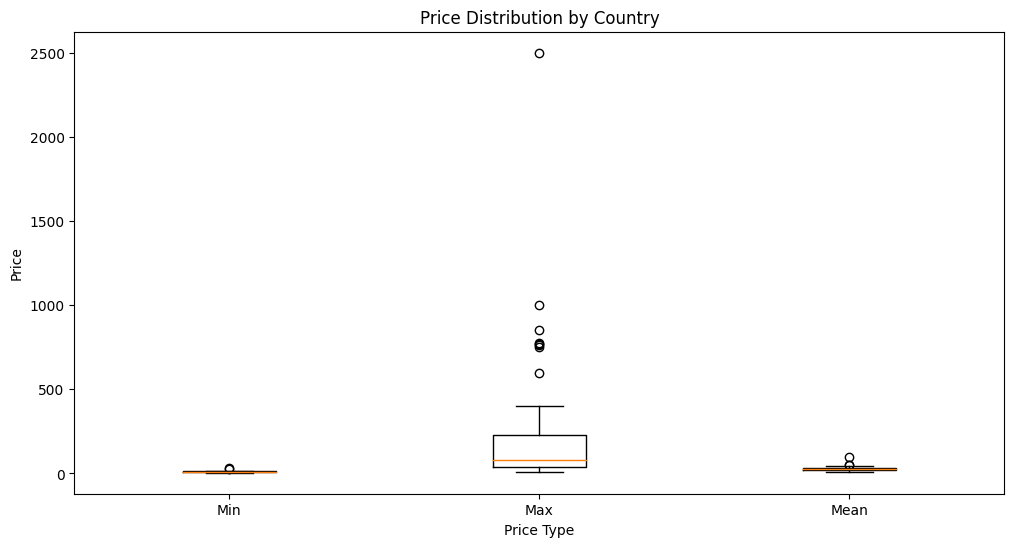

In [66]:
# @title Price Distribution by Country

import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(12, 6))
plt.boxplot([price_df['min'], price_df['max'], price_df['mean']], labels=['Min', 'Max', 'Mean'])
plt.xlabel('Price Type')
plt.ylabel('Price')
_ = plt.title('Price Distribution by Country')


En la grafica podemos ver que aunque los precios de los paises se mantienen similares en los minimos y en la media total, en los precios maximos hay una gran diferencia en ciertos paises, de forma que algunos de sus precios se salen de la media por una gran cantidad.

In [67]:
# ¿De que país es la botella de menor precio?
minprice = df.loc[df['price'].idxmin()]['country']
print(f"El pais con la botella de menor precio es \"{minprice}\"")

El pais con la botella de menor precio es "Spain"


In [68]:
# ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
strawberry_count = df['description'].str.contains('strawberry', na=False).sum()
print(f"Hay {strawberry_count} vinos con algo relacionado a fresa segun los snobs")

Hay 1992 vinos con algo relacionado a fresa segun los snobs


In [69]:
# ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
print(f"Designaciones diferentes: {df['designation'].nunique()}")
print(f"Designacion mas repetida: {df['designation'].mode()[0]}")
print(f"Veces que se repite: {df['designation'].value_counts().max()}")

Designaciones diferentes: 24187
Designacion mas repetida: Reserve
Veces que se repite: 999


In [70]:
# Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares
df_variedad_pais_precio = df[df['price'] < 20][['variety', 'country', 'price']]
display(df_variedad_pais_precio)

,variety,country,price
1,Portuguese Red,Portugal,15.0
2,Pinot Gris,US,14.0
3,Riesling,US,13.0
5,Tempranillo-Merlot,Spain,15.0
6,Frappato,Italy,16.0
...,...,...,...
65456,Cabernet Sauvignon,US,11.0
65472,Chardonnay,US,19.0
65481,Malbec,Argentina,11.0
65482,Cabernet Sauvignon,Australia,17.0


,count
country,
US,4918
France,1001
New Zealand,281
Chile,184
Australia,58
Austria,51
Argentina,46
Germany,31
South Africa,21


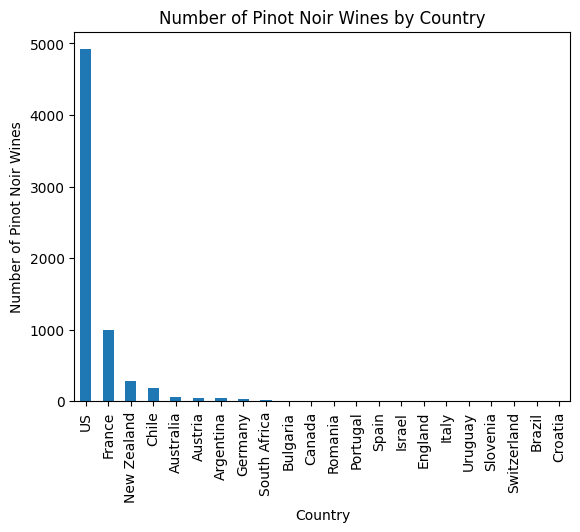

In [71]:
# ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?
df_pinot_noir = df[df['variety'] == 'Pinot Noir']
counts_by_country = df_pinot_noir['country'].value_counts()
display(counts_by_country)

counts_by_country.plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of Pinot Noir Wines')
plt.title('Number of Pinot Noir Wines by Country')
plt.show()